In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Epochs Search
100 p@20 59
150 p@20 65
200 p@20 51
250 p@20 68
300 p@20 61

In [324]:
N = 200
RUN  = 2
FR = 4
DO = 60
# df = pd.read_excel(f'ngt_ngt_300_fr{FR}_do{DO}_epochs{N}_{RUN}.xlsx')
df = pd.read_excel('ngt_ngt_300_fr4_do10_epochs1000_simlabel_noaugs.xlsx')

N_EPOCHS = df.shape[0]

In [325]:
display(df.head())

,epoch,train_prec@1,train_prec@5,train_prec@10,train_prec@20,train_NDCG@1,train_NDCG@5,train_NDCG@10,train_NDCG@20,train_loss,val_prec@1,val_prec@5,val_prec@10,val_prec@20,val_NDCG@1,val_NDCG@5,val_NDCG@10,val_NDCG@20,val_loss
0,1,0.333333,1.000000,2.000000,5.000000,0.405706,0.434774,0.453444,0.476176,0.790207,1.0,1.0,1.0,4.0,0.397203,0.433515,0.456425,0.481343,0.749855
1,2,0.333333,1.000000,3.000000,7.000000,0.402157,0.436668,0.454331,0.478531,0.737136,1.0,1.0,1.0,4.0,0.402976,0.436191,0.458123,0.481945,0.724371
2,3,0.000000,1.000000,2.333334,7.000000,0.402107,0.436671,0.452422,0.477706,0.716070,0.0,1.0,1.0,2.0,0.397541,0.434090,0.457472,0.481426,0.713900
3,4,0.000000,0.666667,3.000000,5.333334,0.405007,0.441590,0.455119,0.479385,0.707511,0.0,1.0,1.0,2.0,0.393384,0.432842,0.456605,0.480009,0.709149
4,5,0.333333,1.666667,3.000000,5.666667,0.411187,0.444856,0.459046,0.482304,0.703923,0.0,0.0,1.0,2.0,0.392220,0.433729,0.457286,0.480297,0.706372


In [336]:
def plot_history_metric(df, metric, f_best, step=100):
    fig = plt.figure(figsize=(20, 8))
    fig.set_facecolor('white')
    fig.set_edgecolor('white')
    x = [1, step] + [step*2 + step * idx for idx in range((N_EPOCHS - step*2) // step + 1)]
    x_ticks = np.arange(1, N_EPOCHS+1)
    # summarize history for accuracy
    train_vales = df[f'train_{metric}'].values
    plt.plot(x_ticks, train_vales)
    # Validation
    val_values = df[f'val_{metric}'].values
    
    # Best Validation Epoch
    val_argmin = f_best(val_values)
    best_label_y = val_values[val_argmin] + 0.05 * (max(val_values.max(), train_vales.max()) - min(val_values.min(), train_vales.min()))
    plt.scatter(val_argmin + 1, val_values[val_argmin], color='red', s=50, marker='o')
    plt.text(val_argmin + 1, best_label_y, f'{val_values[val_argmin]:.2f}',horizontalalignment='center', size=16)
    plt.plot(x_ticks, val_values)
    
    plt.title(f'Model {metric}', fontsize=24, pad=10)
    plt.ylabel(metric, fontsize=20, labelpad=5)
    plt.xlabel('epoch', fontsize=20, labelpad=5)
    plt.tick_params(axis='x', labelsize=8)
    plt.xticks(x, fontsize=16) # set tick step to 1 and let x axis start at 1
    plt.yticks(fontsize=16)
    plt.legend(['train', 'Val', 'Best Val'],  prop={'size': 18})
    plt.grid()

# Loss

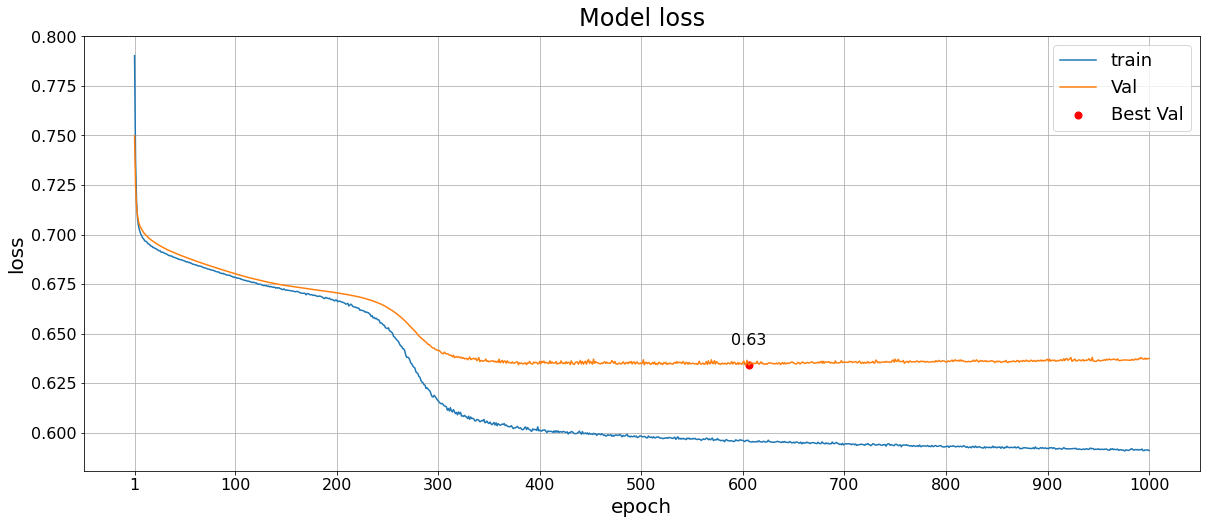

In [337]:
plot_history_metric(df, 'loss', np.argmin)

# Precision

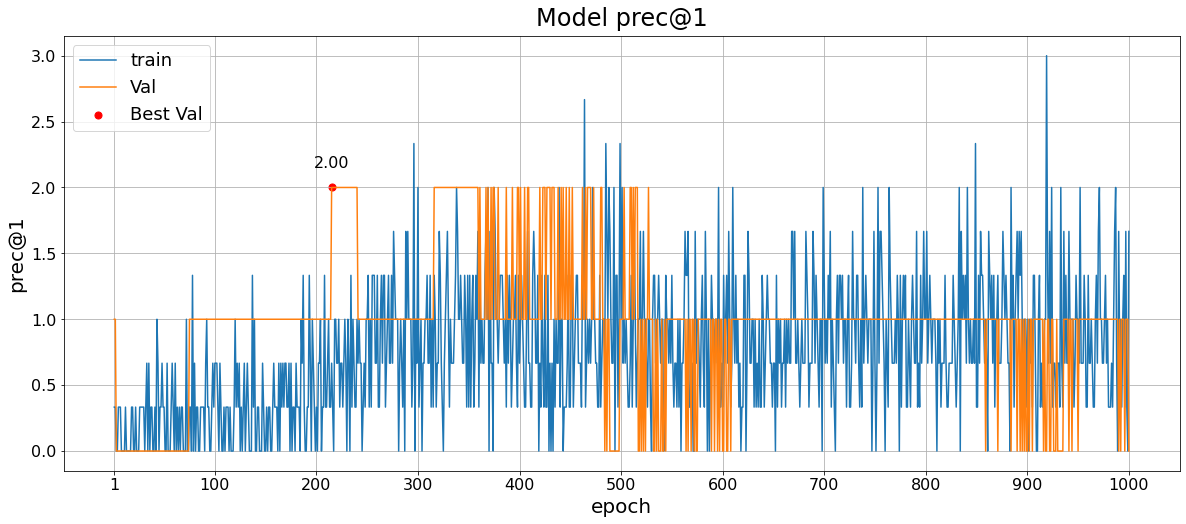

In [338]:
plot_history_metric(df, 'prec@1', np.argmax)

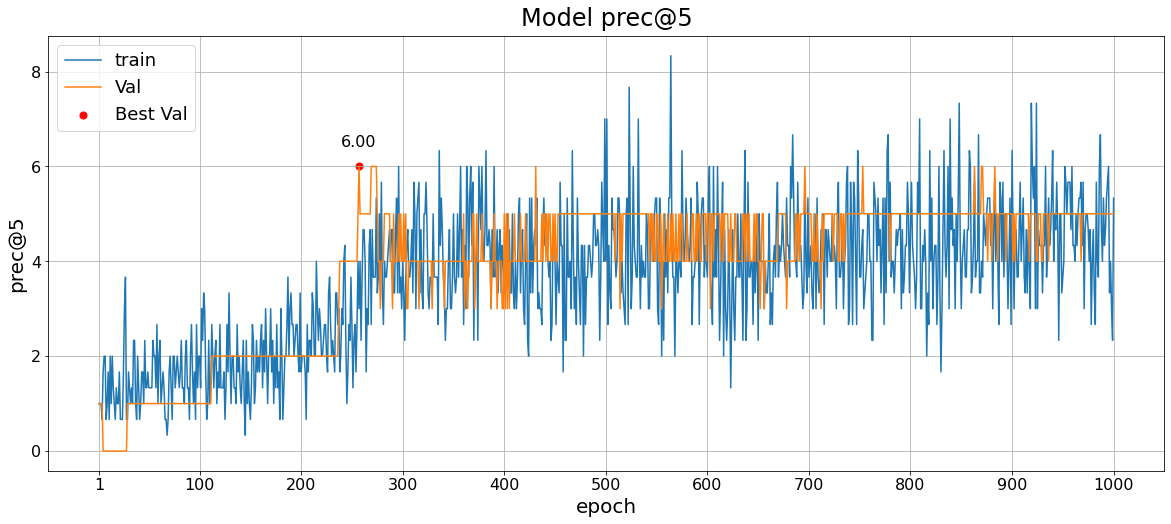

In [339]:
plot_history_metric(df, 'prec@5', np.argmax)

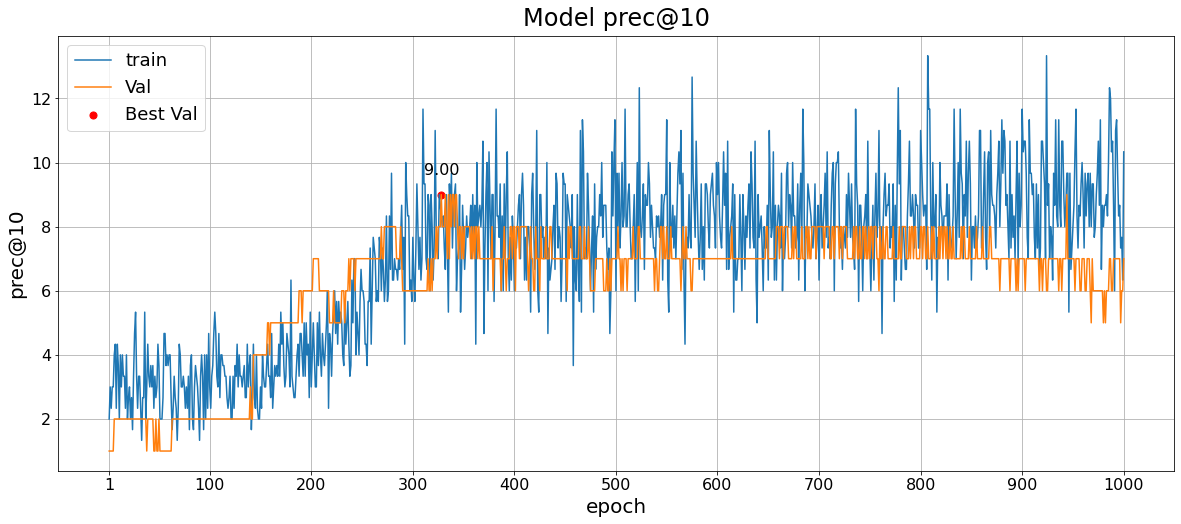

In [340]:
plot_history_metric(df, 'prec@10', np.argmax)

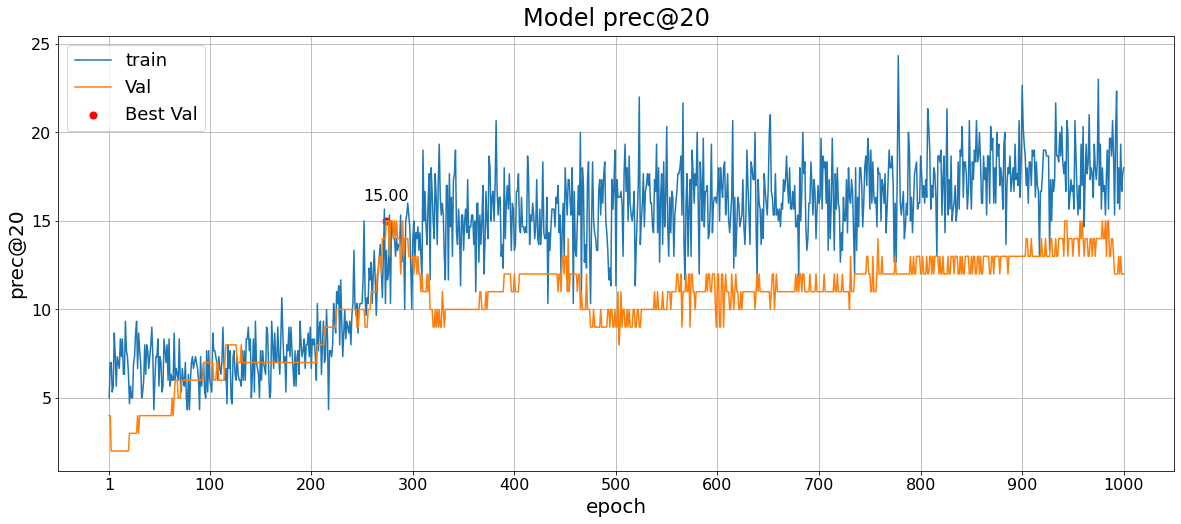

In [341]:
plot_history_metric(df, 'prec@20', np.argmax)

# NDCG

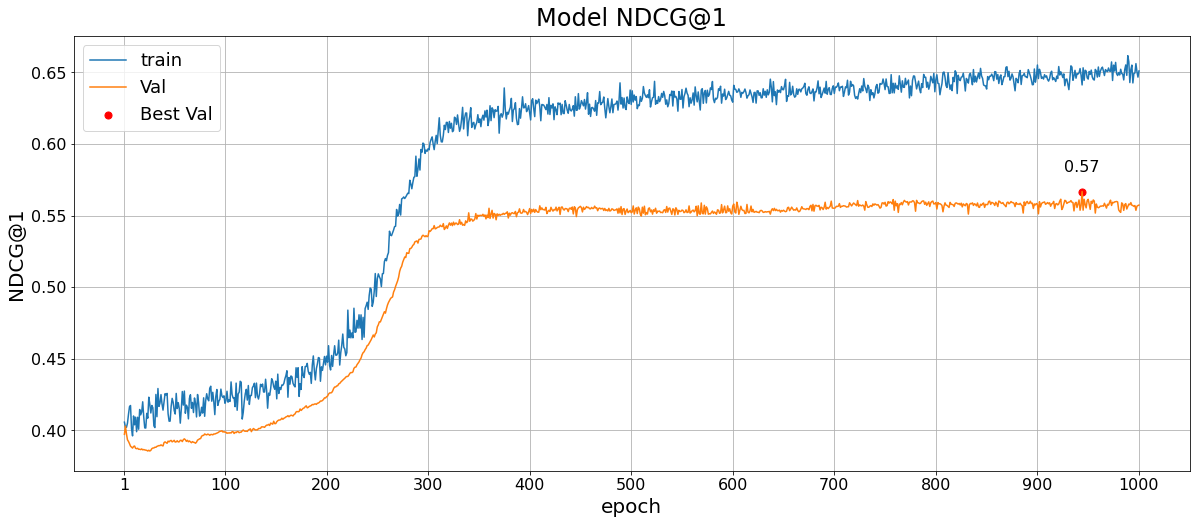

In [342]:
plot_history_metric(df, 'NDCG@1', np.argmax)

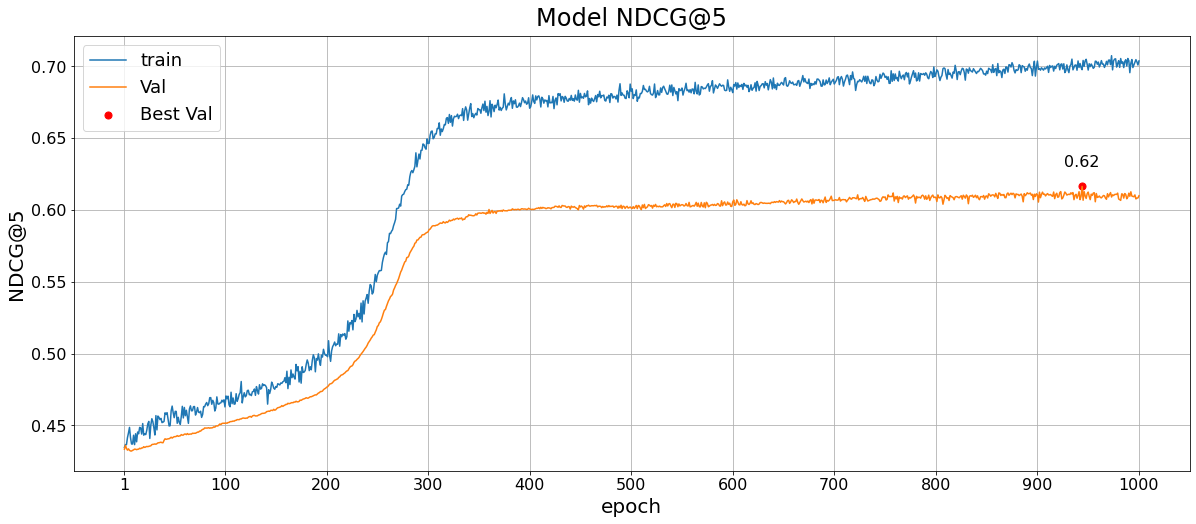

In [343]:
plot_history_metric(df, 'NDCG@5', np.argmax)

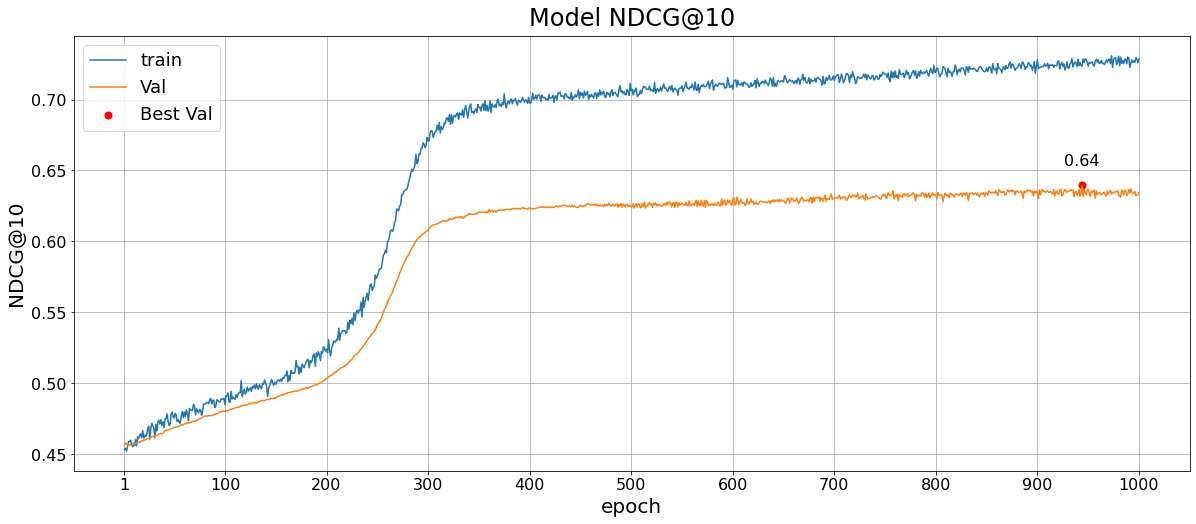

In [344]:
plot_history_metric(df, 'NDCG@10', np.argmax)

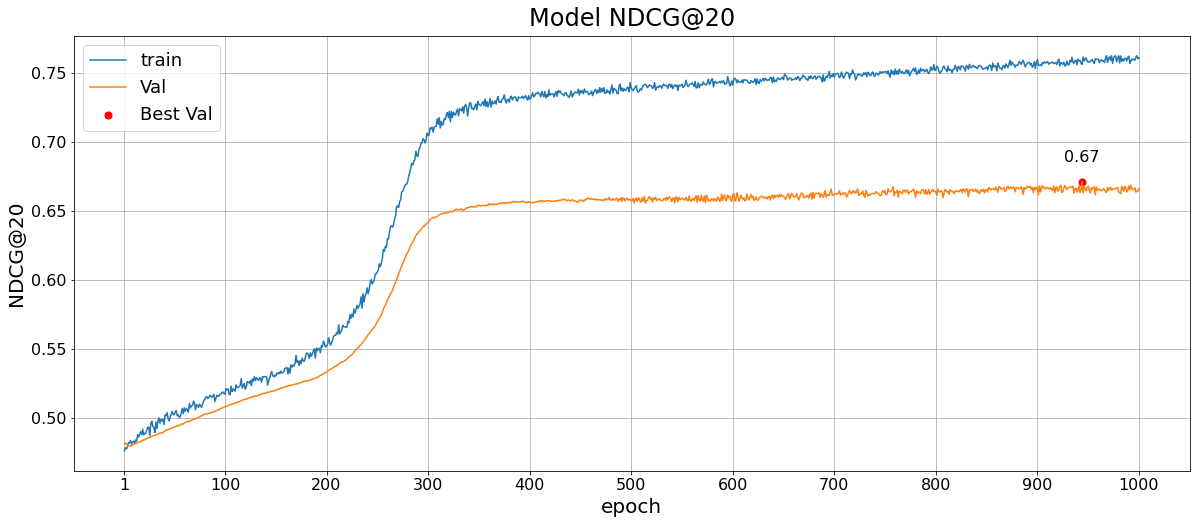

In [345]:
plot_history_metric(df, 'NDCG@20', np.argmax)